In [107]:
import pandas as pd
import sqlite3

In [108]:
!ls zippedData/

bom.movie_gross.csv.gz  im.db2                  tmdb.movies.csv.gz
im.db                   needed_imdb.csv         tn.movie_budgets.csv.gz
im.db 2                 rt.movie_info.tsv.gz
im.db.zip               rt.reviews.tsv.gz


In [109]:
#must do below to open .db files 
# I had to again, unzip the original file to create another data frame
#in this style, since I converted the last to a csv
conn = sqlite3.connect('zippedData/im.db 2')

In [110]:
query1 ="""
SELECT start_year, primary_title
FROM movie_basics
ORDER BY
    start_year 
    
;
"""

pd.read_sql_query(query1, conn)

,start_year,primary_title
0,2010,Pál Adrienn
1,2010,So Much for Justice!
2,2010,Children of the Green Dragon
3,2010,The Final Journey
4,2010,Quantum Quest: A Cassini Space Odyssey
...,...,...
146139,2024,Fantastic Beasts and Where to Find Them 5
146140,2025,Avatar 4
146141,2026,Untitled Star Wars Film
146142,2027,Avatar 5


In [111]:
query1 = """
SELECT DISTINCT
    mr.averagerating,
    mr.numvotes,
    mb.primary_title,
    mb.original_title
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)


,averagerating,numvotes,primary_title,original_title
0,8.8,1841066,Inception,Inception
1,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises
2,8.6,1299334,Interstellar,Interstellar
3,8.4,1211405,Django Unchained,Django Unchained
4,8.1,1183655,The Avengers,The Avengers
...,...,...,...,...
69988,8.6,5,...dann bin ich ja ein Mörder!,...dann bin ich ja ein Mörder!
69989,8.2,5,-1287,-1287
69990,5.6,5,(313) Choices,(313) Choices
69991,6.6,5,#Single,#Single


In [112]:
query1 = """
SELECT 
    mr.averagerating,
    mr.numvotes,
    mb.primary_title,
    mb.original_title
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)


,averagerating,numvotes,primary_title,original_title
0,8.8,1841066,Inception,Inception
1,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises
2,8.6,1299334,Interstellar,Interstellar
3,8.4,1211405,Django Unchained,Django Unchained
4,8.1,1183655,The Avengers,The Avengers
...,...,...,...,...
69988,8.6,5,...dann bin ich ja ein Mörder!,...dann bin ich ja ein Mörder!
69989,8.2,5,-1287,-1287
69990,5.6,5,(313) Choices,(313) Choices
69991,6.6,5,#Single,#Single


In [113]:
query1 = """
SELECT 
    mr.averagerating,
    mr.numvotes,
    mb.primary_title,
    mb.original_title
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
WHERE
    mb.primary_title is mb.original_title
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)

,averagerating,numvotes,primary_title,original_title
0,8.8,1841066,Inception,Inception
1,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises
2,8.6,1299334,Interstellar,Interstellar
3,8.4,1211405,Django Unchained,Django Unchained
4,8.1,1183655,The Avengers,The Avengers
...,...,...,...,...
59145,8.6,5,...dann bin ich ja ein Mörder!,...dann bin ich ja ein Mörder!
59146,8.2,5,-1287,-1287
59147,5.6,5,(313) Choices,(313) Choices
59148,6.6,5,#Single,#Single


In [114]:
query1 = """
SELECT 
    mr.averagerating,
    mr.numvotes,
    mb.primary_title,
    mb.original_title
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
WHERE
    mb.primary_title is not mb.original_title
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)

,averagerating,numvotes,primary_title,original_title
0,7.2,692794,Iron Man 3,Iron Man Three
1,8.5,677343,The Intouchables,Intouchables
2,7.7,608930,X-Men: First Class,X: First Class
3,7.8,478592,Rogue One: A Star Wars Story,Rogue One
4,7.1,462903,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi
...,...,...,...,...
11829,6.6,5,A Journey with Korean Masters,Ma-seu-teo-keul-lae-seu-ui san-chaek
11830,7.0,5,A Cup of Tea,En kopp te
11831,6.8,5,A Crimson Star,Makkana hoshi
11832,6.6,5,A Better Life Is Elsewhere,Das bessere Leben ist anderswo


*Here, above, we see that the primary title is the common english title version that viewers, and our audience will recognize and understand.*

We also see here that almost 12,000 primary titles do not match their original titles. These must remain in the data set. 

In [115]:
query1 = """
SELECT 
    mr.averagerating,
    mr.numvotes,
    mb.primary_title,
    mb.original_title
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
WHERE
    mr.numvotes > 50
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)

,averagerating,numvotes,primary_title,original_title
0,8.8,1841066,Inception,Inception
1,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises
2,8.6,1299334,Interstellar,Interstellar
3,8.4,1211405,Django Unchained,Django Unchained
4,8.1,1183655,The Avengers,The Avengers
...,...,...,...,...
35103,6.6,51,A Reason,A Reason
35104,5.1,51,A Moving Image,A Moving Image
35105,5.5,51,51 Nevada,51 Nevada
35106,5.7,51,1:13:7 Ek Tera Saath,1:13:7 Ek Tera Saath


In [116]:
#above we see that removing any movie with less than 50 votes takes our
#total number from 70k to 35k. 

In [117]:
query1 = """
SELECT 
    mb.primary_title,
    mb.original_title,
    mr.averagerating,
    mr.numvotes
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
WHERE
    mr.numvotes > 50 
    AND
    mr.averagerating > 7
GROUP BY
    mb.primary_title
ORDER BY
    mr.numvotes DESC
;
"""
pd.read_sql_query(query1, conn)

,primary_title,original_title,averagerating,numvotes
0,Inception,Inception,8.8,1841066
1,The Dark Knight Rises,The Dark Knight Rises,8.4,1387769
2,Interstellar,Interstellar,8.6,1299334
3,Django Unchained,Django Unchained,8.4,1211405
4,The Avengers,The Avengers,8.1,1183655
...,...,...,...,...
8027,Baa Baa Land,Baa Baa Land,7.4,51
8028,Alien Addiction,Alien Addiction,8.8,51
8029,Aisheen (Still Alive in Gaza),Aisheen (Still Alive in Gaza),7.8,51
8030,Abe,Abe,8.2,51


In [118]:
query1 = """
SELECT 
    mb.primary_title,
    mb.genres,
    mr.averagerating,
    mr.numvotes, 
    p.primary_name AS Director_Name,
    mb.start_year,
    mb.runtime_minutes
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
    JOIN 
        directors as d
    ON
        d.movie_id = mb.movie_id
    JOIN 
        persons as p
    ON 
        p.person_id = d.person_id
WHERE
    mr.numvotes > 50 
    AND
    mr.averagerating > 7
GROUP BY
    mb.primary_title
ORDER BY
    mr.averagerating DESC
;
"""
pd.read_sql_query(query1, conn)

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0
...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [119]:
query1 = """
SELECT 
    mb.primary_title,
    mb.genres,
    mr.averagerating,
    mr.numvotes, 
    p.primary_name AS Director_Name,
    mb.start_year,
    mb.runtime_minutes
FROM 
    movie_ratings as mr
    JOIN
        movie_basics as mb
    ON
        mb.movie_id = mr.movie_id
    JOIN 
        directors as d
    ON
        d.movie_id = mb.movie_id
    JOIN 
        persons as p
    ON 
        p.person_id = d.person_id
WHERE
    mr.numvotes > 25 
    AND
    mr.averagerating > 7
GROUP BY
    mb.primary_title
ORDER BY
    mr.averagerating DESC
;
"""
pd.read_sql_query(query1, conn)

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Verdict 19,"Biography,Documentary,Drama",9.8,28,Vyacheslav Bihun,2019,NaN
2,RISE: The Story of Augustines,"Documentary,Music",9.8,45,Todd Howe,2018,80.0
3,Our Friend Jon,Documentary,9.8,28,Edward Payson,2018,NaN
4,La Lección de Anatomía,Documentary,9.8,28,Agustín Kazah,2019,NaN
...,...,...,...,...,...,...,...
11185,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
11186,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
11187,03.ByPass,Drama,7.1,38,Nap Toader,2016,93.0
11188,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [120]:
query1 = """
SELECT *
FROM 
    movie_basics 
GROUP BY
    start_year
ORDER BY
    start_year ASC
;
"""
pd.read_sql_query(query1, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama
1,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History"
2,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
4,tt0329539,Rice Girl,Rice Girl,2014,95.0,"Adventure,Comedy,Romance"
5,tt0283440,Short Time Heroes,Kurzzeithelden,2015,45.0,Sci-Fi
6,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama"
7,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
8,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
9,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [121]:
#ImdbNeeded =

In [122]:
#ImdbNeeded.to_csv('zippedData/needed_imdb.csv', index=False)

In [123]:
pd.read_csv("zippedData/needed_imdb.csv")

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0
...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [124]:
imdf = pd.read_csv("zippedData/needed_imdb.csv")

In [125]:
imdf.head()

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0


In [126]:
imdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7969 entries, 0 to 7968
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    7969 non-null   object 
 1   genres           7938 non-null   object 
 2   averagerating    7969 non-null   float64
 3   numvotes         7969 non-null   int64  
 4   Director_Name    7969 non-null   object 
 5   start_year       7969 non-null   int64  
 6   runtime_minutes  7677 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 435.9+ KB


In [127]:
imdf.isna().sum()

primary_title        0
genres              31
averagerating        0
numvotes             0
Director_Name        0
start_year           0
runtime_minutes    292
dtype: int64

In [128]:
imdf.min()

/var/folders/1q/n0cxxczs6zn8d4fx32dvdhwm0000gn/T/ipykernel_63064/146472830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  imdf.min()


primary_title      #Female Pleasure
averagerating                   7.1
numvotes                         51
Director_Name        A. Karunakaran
start_year                     2010
runtime_minutes                15.0
dtype: object

In [129]:
#making a copy of our dataframe 
imdf_clean = imdf.copy()

In [130]:
imdf_clean = imdf_clean.dropna(axis=0,subset = ['runtime_minutes'])

In [131]:
#removed any movies listed without runtime, but decided to keep missing genres, as this could be 
#considered a category when analyzing our genre vs. popularity
imdf_clean

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0
...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [132]:
imdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7677 entries, 0 to 7968
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    7677 non-null   object 
 1   genres           7655 non-null   object 
 2   averagerating    7677 non-null   float64
 3   numvotes         7677 non-null   int64  
 4   Director_Name    7677 non-null   object 
 5   start_year       7677 non-null   int64  
 6   runtime_minutes  7677 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 479.8+ KB


In [133]:
imdf_clean['genres'] = imdf_clean['genres'].fillna('None')

In [134]:
#see now there are no null values, we converted any nulls to "None" in 
#genres
imdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7677 entries, 0 to 7968
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    7677 non-null   object 
 1   genres           7677 non-null   object 
 2   averagerating    7677 non-null   float64
 3   numvotes         7677 non-null   int64  
 4   Director_Name    7677 non-null   object 
 5   start_year       7677 non-null   int64  
 6   runtime_minutes  7677 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 479.8+ KB


In [135]:
imdf_clean['genres'].value_counts()

Documentary                    1506
Drama                          1123
Comedy,Drama                    309
Comedy                          227
Drama,Romance                   196
                               ... 
Action,Horror                     1
Drama,History,Musical             1
Adventure,Comedy,Musical          1
Action,Documentary,Thriller       1
Animation,Documentary,War         1
Name: genres, Length: 459, dtype: int64

In [136]:
imdf_clean['Director_Name'].value_counts()

Alex Gibney              15
Srijit Mukherji           9
Shiboprosad Mukherjee     9
Kaushik Ganguly           8
Hanung Bramantyo          8
                         ..
Joel Colón                1
Anna Roussillon           1
Shin'ichirô Ushijima      1
Larry Wessel              1
Mamoru Hoshi              1
Name: Director_Name, Length: 6167, dtype: int64

In [137]:
#require the number of votes to be over 50 
imdf_clean = imdf_clean[imdf_clean['numvotes'] > 50]

In [138]:
imdf_clean

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0
...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [139]:
imdf_clean.max()

primary_title      Üç Harfliler: Adak
genres                            War
averagerating                     9.9
numvotes                      1841066
Director_Name             Ümit Kivanç
start_year                       2019
runtime_minutes                1440.0
dtype: object

In [140]:
imdf_clean = imdf_clean[imdf_clean['start_year'] < 2022]

In [141]:
imdf_clean

,primary_title,genres,averagerating,numvotes,Director_Name,start_year,runtime_minutes
0,Gini Helida Kathe,Drama,9.9,417,Nagaraja Uppunda,2019,138.0
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,Quentin Tarantino,2019,159.0
2,Eghantham,Drama,9.7,639,Arsel Arumugam,2018,125.0
3,DOSED,Documentary,9.7,72,Tyler Chandler,2019,82.0
4,Yeh Suhaagraat Impossible,Comedy,9.6,624,Abhinav Thakur,2019,92.0
...,...,...,...,...,...,...,...
7964,10 1/2,Drama,7.1,578,Daniel Grou,2010,108.0
7965,"1,778 Stories of Me and My Wife",Drama,7.1,232,Mamoru Hoshi,2011,139.0
7966,"1,000 Times Good Night","Drama,War",7.1,6848,Erik Poppe,2013,117.0
7967,#Walang Forever,"Comedy,Romance",7.1,160,Dan Villegas,2015,119.0


In [142]:
#The filtering done at the top, must've removed anything that isn't out
#yet, becuase it would not have any reviews yet 

#i've also now learned that this data base only dates back to 2010 and 
#only has good data up to 2019

In [143]:
imdf_clean['start_year'].value_counts()

2017    950
2016    904
2018    893
2014    867
2015    840
2013    813
2012    749
2011    736
2010    662
2019    263
Name: start_year, dtype: int64

In [144]:
#here we see something interesting.... it appears that the total number
# of reviews increases with each year, but it takes 2 years for that value
# to plateau-ish... and it appears this data was taken before 2020
# so 2019 is the lowest, because it there hasnt been enough time 
# for more review to come in, and 2018 is 3rd from the top, so clearly is 
# hasn't recevied the majority of its reviews yet either. 

#actually scratch that... these are the start dates, so it must mean
#the start of production. 

# We want to give the most weight to the highest reviews from the most 
# recent years, so I will have to figure out how to do that 

# I think i want to find the trend and determine where their counts
# are expected to be in a couple years, and use that value to give 
# them extra weight 

In [145]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [146]:
imdf_clean['start_year'].value_counts(ascending=True)

2019    263
2010    662
2011    736
2012    749
2013    813
2015    840
2014    867
2018    893
2016    904
2017    950
Name: start_year, dtype: int64

In [147]:
imdf_clean['start_year'].value_counts(ascending=False)

2017    950
2016    904
2018    893
2014    867
2015    840
2013    813
2012    749
2011    736
2010    662
2019    263
Name: start_year, dtype: int64

In [148]:
x = np.array([2017, 2016, 2018, 2014, 2015, 2013, 2012, 2011, 2010, 2019])
y = np.array([950, 904, 893, 867, 840, 813, 749, 736, 662, 263])

38.535714285715244
-76776.53571428765


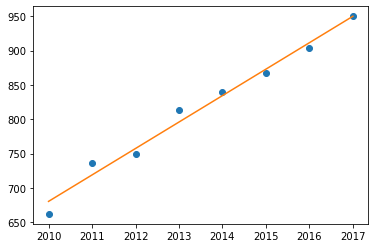

In [99]:
x = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
y = np.array([662, 736, 749, 813, 840, 867, 904, 950])
m, b = np.polyfit(x,y,1)

print(m)
print(b)

plt.plot(x,y,'o')

plt.plot(x, m*x + b)

In [ ]:
#plotting a best fit line over my value_counts for my 
# movie year, the slope can tell me approx how many movies we would
# expect to have in 2018 and 2019 with more time ... thus, our data from
# 2018 and 2019 should be weigted more heavily to make up for this lacking
# ..more weight should be given to highly rated films from these more recent
# years 

In [ ]:
# we can see that the counts # is lower in 2018 and 2019 then they 
should be, so we will use the formula above to increase the counts
of all those ratings for the movies made in those years 

check notebook for work on those 

In [101]:
imdf_clean['start_year'].mean()

2014.4191741565717

In [149]:
imdf_clean['start_year'].value_counts(ascending=True)

2019    263
2010    662
2011    736
2012    749
2013    813
2015    840
2014    867
2018    893
2016    904
2017    950
Name: start_year, dtype: int64

In [152]:
imdf_2010 = imdf_clean[imdf_clean['start_year'] == 2010]

In [160]:
imdf_clean.loc[imdf_clean['start_year'] == 2010][['start_year', 'numvotes',
                                                 'averagerating']]

,start_year,numvotes,averagerating
80,2010,1172,9.2
125,2010,138,9.1
145,2010,85,9.1
207,2010,219,8.9
211,2010,231,8.9
...,...,...,...
7903,2010,2020,7.1
7908,2010,56,7.1
7920,2010,547,7.1
7940,2010,490,7.1


In [ ]:
imdf_2010.loc[]